# Zigbee dataset processing examples

This notebook is related to the Zigbee dataset available at [doi.org/10.57745/NDW74U](https://doi.org/10.57745/NDW74U). It provides a few insights concerning the behavior of the 0x0A12 Motion Sensor.

The starting point is the JSON example file named `rpi2-2022-07-01-18-00-00.json`. This JSON file is obtained after the `zigbee_dataset_preprocess.py` script has been run on the example capture file named `rpi2-2022-07-01-18-00-00.pcap`.

The names of the PCAP or JSON files tells that the capture has been made from the RPI2 probe and that it started on July 1st, 2022 at 18:00:00 (CEST). The duration of the capture is one hour, like all PCAP files in the dataset.

In [ ]:
import json
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Retrieve JSON file and prepare a dataframe

In [ ]:
with open('/content/rpi2-2022-07-01-18-00-00.json') as f: # replace with your own path to the json file
  packets = json.load(f)
print(type(packets))
print(len(packets))

<class 'list'>
31701


Note: the Wireshark filter (to be applied to the PCAP file) that renders the same list of packets is:

`wpan.fcs_ok and !wpan.fcs.bad and wpan.src16 and wpan.security==0 and wpan.frame_type<=3`

Transform the list of packets into a Numpy array and then to a dataframe:

In [ ]:
np_packets = np.asarray(packets, dtype=np.int64)

In [ ]:
fulldataframe = pd.DataFrame(
        np_packets,
        columns=["packet_idx", "src16", "length (byte)", "time_rel_us", "rssi (dBm)", "epoch_us"],
     )

In [ ]:
fulldataframe

packet_idx  src16  length (byte)  time_rel_us  rssi (dBm)  \
0               0   8957             50            0         -68   
1               2  31863             55         5434         -84   
2               4   3078             57        11566         -60   
3               6  31863             53        53858         -84   
4               8   3078             53        57776         -60   
...           ...    ...            ...          ...         ...   
31696       55167  31646             53   3599192206         -63   
31697       55169   8957             50   3599223099         -72   
31698       55171  31646             53   3599228489         -63   
31699       55173   8957             52   3599293719         -72   
31700       55175  31646             59   3599299574         -63   

               epoch_us  
0      1656691201216858  
1      1656691201222292  
2      1656691201228424  
3      1656691201270716  
4      1656691201274634  
...                 ...  
31696  1656694800409064  
31697  1656694800439957  
31698  1656694800445347  
31699  1656694800510577  
31700  1656694800516432  

[31701 rows x 6 columns]

## Identify present devices by their 16-bit source identifier

Note: An identifier that is found that way does note necessarily correspond to a real legitimate device (in case of a spoofing attack for example).

In [ ]:
np.unique(fulldataframe['src16'])

array([ 2578,  3078,  8957, 18154, 24250, 31646, 31863, 41643, 43231])

In [ ]:
# in hexadecimal
[hex(x) for x in np.unique(fulldataframe['src16'])]

['0xa12',
 '0xc06',
 '0x22fd',
 '0x46ea',
 '0x5eba',
 '0x7b9e',
 '0x7c77',
 '0xa2ab',
 '0xa8df']

## Integrate a human readable date

`epoch_us` is in UTC time:

In [ ]:
fulldataframe['date'] = pd.to_datetime(fulldataframe['epoch_us'], unit='us', utc=True)

Handle our own time zone:

In [ ]:
fulldataframe['date'] = fulldataframe['date'].dt.tz_convert('Europe/Paris')

In [ ]:
fulldataframe

packet_idx  src16  length (byte)  time_rel_us  rssi (dBm)  \
0               0   8957             50            0         -68   
1               2  31863             55         5434         -84   
2               4   3078             57        11566         -60   
3               6  31863             53        53858         -84   
4               8   3078             53        57776         -60   
...           ...    ...            ...          ...         ...   
31696       55167  31646             53   3599192206         -63   
31697       55169   8957             50   3599223099         -72   
31698       55171  31646             53   3599228489         -63   
31699       55173   8957             52   3599293719         -72   
31700       55175  31646             59   3599299574         -63   

               epoch_us                             date  
0      1656691201216858 2022-07-01 18:00:01.216858+02:00  
1      1656691201222292 2022-07-01 18:00:01.222292+02:00  
2      1656691201228424 2022-07-01 18:00:01.228424+02:00  
3      1656691201270716 2022-07-01 18:00:01.270716+02:00  
4      1656691201274634 2022-07-01 18:00:01.274634+02:00  
...                 ...                              ...  
31696  1656694800409064 2022-07-01 19:00:00.409064+02:00  
31697  1656694800439957 2022-07-01 19:00:00.439957+02:00  
31698  1656694800445347 2022-07-01 19:00:00.445347+02:00  
31699  1656694800510577 2022-07-01 19:00:00.510577+02:00  
31700  1656694800516432 2022-07-01 19:00:00.516432+02:00  

[31701 rows x 7 columns]

Let's remove some ininteresting fields:

In [ ]:
dataframe=fulldataframe[['src16', 'length (byte)', 'rssi (dBm)', 'date']]

In [ ]:
dataframe

src16  length (byte)  rssi (dBm)                             date
0       8957             50         -68 2022-07-01 18:00:01.216858+02:00
1      31863             55         -84 2022-07-01 18:00:01.222292+02:00
2       3078             57         -60 2022-07-01 18:00:01.228424+02:00
3      31863             53         -84 2022-07-01 18:00:01.270716+02:00
4       3078             53         -60 2022-07-01 18:00:01.274634+02:00
...      ...            ...         ...                              ...
31696  31646             53         -63 2022-07-01 19:00:00.409064+02:00
31697   8957             50         -72 2022-07-01 19:00:00.439957+02:00
31698  31646             53         -63 2022-07-01 19:00:00.445347+02:00
31699   8957             52         -72 2022-07-01 19:00:00.510577+02:00
31700  31646             59         -63 2022-07-01 19:00:00.516432+02:00

[31701 rows x 4 columns]

In [ ]:
print("First packet is at: \t", fulldataframe['date'].min())
print("Last packet is at: \t", fulldataframe['date'].max())

First packet is at: 	 2022-07-01 18:00:01.216858+02:00
Last packet is at: 	 2022-07-01 19:00:00.516432+02:00


## Filter frames having 2578 (0x0A12) as 16-bit source identifier

In [ ]:
df_2578=dataframe.loc[fulldataframe['src16']==2578]

In [ ]:
df_2578

src16  length (byte)  rssi (dBm)                             date
47      2578             12         -85 2022-07-01 18:00:05.845679+02:00
84      2578             12         -85 2022-07-01 18:00:10.844339+02:00
147     2578             12         -85 2022-07-01 18:00:15.840711+02:00
178     2578             12         -85 2022-07-01 18:00:20.839353+02:00
220     2578             12         -85 2022-07-01 18:00:25.836941+02:00
...      ...            ...         ...                              ...
31466   2578             12         -84 2022-07-01 18:59:37.603220+02:00
31529   2578             12         -83 2022-07-01 18:59:42.602162+02:00
31579   2578             12         -85 2022-07-01 18:59:47.598778+02:00
31625   2578             12         -85 2022-07-01 18:59:52.600214+02:00
31659   2578             12         -84 2022-07-01 18:59:57.600337+02:00

[841 rows x 4 columns]

In [ ]:
# remove src16 field
df_2578 = df_2578[['length (byte)', 'rssi (dBm)', 'date']]

Note: the Wireshark filter (to be applied to the PCAP file) that renders the same list of packets is:

`wpan.fcs_ok and !wpan.fcs.bad and wpan.src16==0x0A12 and wpan.security==0 and wpan.frame_type<=3`

## Get statistical insights

### General

In [ ]:
df_2578.describe().transpose()

count       mean        std   min   25%   50%   75%   max
length (byte)  841.0  15.505351  11.644753  12.0  12.0  12.0  12.0  86.0
rssi (dBm)     841.0 -83.481570   1.377526 -91.0 -84.0 -83.0 -83.0 -79.0

### Packet length distribution
This is an illustration of IoT devices determinist behavior: most frames issued by 0x0A12 (a motion sensor) are 12-byte long.

Deviation from this reference distribution could be a mean to detect an attack.

In [ ]:
df_2578.hist(bins=50,column='length (byte)')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62c20a0910>]],
      dtype=object)

### Distribution of RSSI seen from RPI2 

In [ ]:
df_2578.hist(bins=50,column='rssi (dBm)')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62c16e04f0>]],
      dtype=object)

## Plot RSSI against time

Text(0.5, 1.0, 'RSSI associated with identifier 2578 (0x0A12), seen from RPI2 probe')

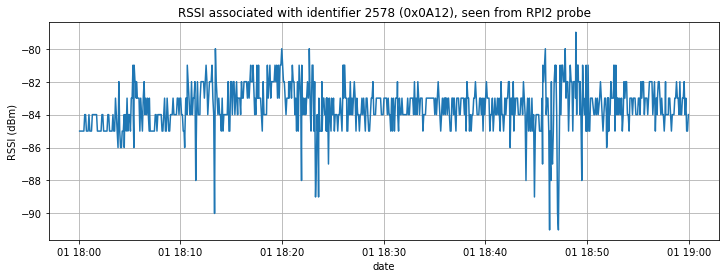

In [ ]:
fig0, ax = plt.subplots()
fig0.set_size_inches(12,4)
ax.plot(df_2578['date'], df_2578['rssi (dBm)'])
ax.grid()
ax.set_xlabel('date')
ax.set_ylabel('RSSI (dBm)')
ax.set_title('RSSI associated with identifier 2578 (0x0A12), seen from RPI2 probe')

Notes:
* During this one hour capture (free of attack), RSSI fluctuates a lot due to people in the house, signal reflection on the walls and so on. The challenge is to extract useful information from this noisy measures.
* The 1-dBM quantization of the CC2531 used in the probe is obvious on this figure.